In [8]:
# load the model from the file "sbm3x3_pclam_roc_0.210_auc_0.860"
import torch
from torch_geometric.transforms import TwoHop

import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

from datasets.import_dataset import import_dataset
from utils.plotting import *
from trainer import Trainer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)
cpu = torch.device("cpu")

%load_ext autoreload
%autoreload 2


Using device: cuda
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload




/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-12-23 00:16:48 starting optimization of pieclam on elliptic on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 30,
        "dim_attr": 93,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 2e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 3,
        "scheduler_step_size": 1,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_feats"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:544:::  
in fit,
first_func_in_fit='fit_feats'
second_function_name='fit_prior'


/home/user/

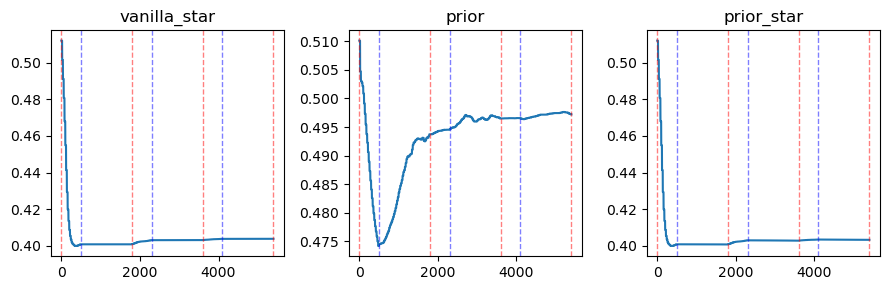



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:667:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:418:::  


FINISHED train 
 last accuracies:
test
key='vanilla_star': 0.4038740467475822
test
key='prior': 0.49721007959801666
test
key='prior_star': 0.4033464533182478


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:432:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-12-23 00:19:19 starting optimization of pieclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 30,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 2e-06,
        "noise_amp":

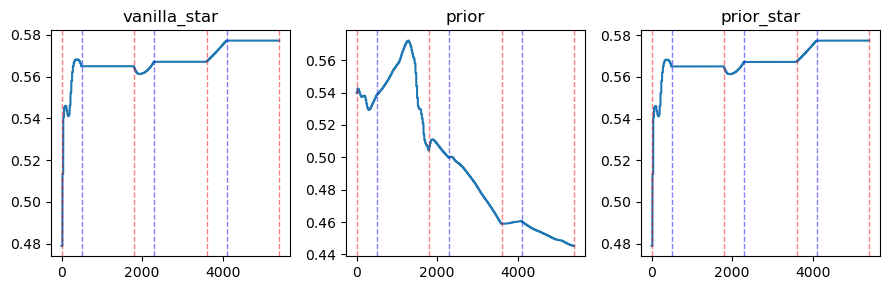



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:667:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:418:::  


FINISHED train 
 last accuracies:
test
key='vanilla_star': 0.5772424743614406
test
key='prior': 0.44516543106969364
test
key='prior_star': 0.5773543718281574


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:432:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-12-23 00:21:46 starting optimization of pieclam on reddit on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 30,
        "dim_attr": 64,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 2e-06,
        "noise_amp":

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.38 GiB. GPU 0 has a total capacity of 23.63 GiB of which 1.92 GiB is free. Process 9962 has 554.00 MiB memory in use. Process 2325031 has 1.84 GiB memory in use. Process 2442017 has 1.77 GiB memory in use. Including non-PyTorch memory, this process has 16.22 GiB memory in use. Process 2443336 has 478.00 MiB memory in use. Process 2443390 has 496.00 MiB memory in use. Of the allocated memory 15.29 GiB is allocated by PyTorch, and 485.22 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [9]:

model_names = ['pieclam']
ds_names = ['elliptic','photo', 'reddit']

for model_name in model_names:    
    for ds_name in ds_names:
        
        ds = import_dataset(ds_name)
        ds_to_use = ds
        if ds_name in ['photo', 'reddit']:
            fat_ds = TwoHop()(ds)
            fat_ds.edge_attr = torch.ones(fat_ds.edge_index.shape[1]).bool()
            ds_to_use = fat_ds
    



        losseses = []
        acc_testses = []
        acc_valses = []

        trainer_anomaly = Trainer(
            model_name=model_name,
            device=device,
            dataset=ds_to_use.clone(),
            attr_opt=False,
            task='anomaly',
            mighty_configs_dict=True,            
        )

        losses, acc_test, acc_val = trainer_anomaly.train(
            init_type='small_gaus',
            init_feats=True,
            acc_every=20,
            plot_every=-1,
            verbose=False,
            verbose_in_funcs=False
        )
        losseses.append(losses)
        acc_testses.append(acc_test)
        acc_valses.append(acc_val)
        
        if trainer_anomaly.clamiter.prior is not None:
            del trainer_anomaly.clamiter.prior.model
        del trainer_anomaly.data
        torch.cuda.empty_cache()

        del ds
        # del ds_to_use
        if ds_name in ['reddit', 'photo']:
            del fat_ds
        torch.cuda.empty_cache()



# Ablation Study: Densification

In [13]:

# ABLATION STUDY WITHOUT DENSIFICATION

model_names = ['pieclam']
ds_names = ['photo', 'elliptic', 'reddit']


final_accs = {'photo': {'vanilla_star':[],'prior':[],'prior_star':[]}, 'elliptic': {'vanilla_star':[],'prior':[],'prior_star':[]}, 'reddit': {'vanilla_star':[],'prior':[],'prior_star':[]}}

for model_name in model_names:    
    for ds_name in ds_names:
        
        ds = import_dataset(ds_name)
        for _ in range(10):   
            #! NOTICE: no densification!
            ds_to_use = ds

            
 
            # config_triplets = [['feat_opt', 'n_iter', 20],
            #                 ['prior_opt', 'n_iter', 20],]
            config_triplets = []

            trainer_anomaly = Trainer(
                model_name=model_name,
                device=device,
                dataset=ds_to_use.clone(),
                attr_opt=True,
                task='anomaly',
                mighty_configs_dict=True,
                config_triplets_to_change=config_triplets
            )

            losses, acc_test, acc_val = trainer_anomaly.train(
                init_type='small_gaus',
                init_feats=True,
                acc_every=20,
                plot_every=10000,
                verbose=False,
                verbose_in_funcs=False
            )

            final_accs[ds_name]['vanilla_star'].append(acc_test['vanilla_star'][-1])
            final_accs[ds_name]['prior'].append(acc_test['prior'][-1])
            final_accs[ds_name]['prior_star'].append(acc_test['prior_star'][-1])

        if trainer_anomaly.clamiter.prior is not None:
            del trainer_anomaly.clamiter.prior.model
        del trainer_anomaly.data
        torch.cuda.empty_cache()

        del ds
        del ds_to_use
       
        torch.cuda.empty_cache()





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:302:::  
 2024-09-14 23:05:49 starting optimization of piegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 30,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 2e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 3,
        "scheduler_step_size": 1,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_feats"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:546:::  
in fit,
first_func_in_fit='fit_feats'
second_function_name='fit_prior'


/home/user/Doc

In [15]:
# get mean and std for final accuracies.
for key in final_accs:
    print(key)
    for key2 in final_accs[key]:
        print(key2, np.mean(final_accs[key][key2]), np.std(final_accs[key][key2]))

photo
vanilla_star 0.5293380477898575 0.004605985829288573
prior 0.4324738066579411 0.008910819482738077
prior_star 0.4537777222730021 0.0030117688529705962
elliptic
vanilla_star 0.40093508042993575 0.0021141649818371337
prior 0.6378584290946936 0.02445695561468855
prior_star 0.6181259748707391 0.023257841239397
reddit
vanilla_star 0.5480807213588227 0.002172475245242343
prior 0.5088448429092982 0.03836777280380825
prior_star 0.5466093823500048 0.004664033321661206


# Vanilla methods

In [ ]:
# anomaly detection with ieclam

model_names = ['ieclam']
ds_names = ['photo', 'elliptic', 'reddit']

for model_name in model_names:    
    for ds_name in ds_names:
        
        ds = import_dataset(ds_name)
        if ds_name in ['reddit', 'photo', 'elliptic']:
            fat_ds = TwoHop()(ds)
            fat_ds.edge_attr = torch.ones(fat_ds.edge_index.shape[1]).bool()
            ds_to_use = fat_ds
        
        # ds_to_use = ds
        losseses = []
        acc_testses = []
        acc_valses = []
        
        '''change some of the configs manually e.g. 
        config_triplets = [['feat_opt', 'n_iter', 1000], ['prior_opt, 'lr', 0.0001], ...]'''
        config_triplets = []

        trainer_anomaly = Trainer(
            model_name=model_name,
            device=device,
            dataset=ds_to_use.clone(),
            attr_opt=True,
            task='anomaly',
            mighty_configs_dict=True,
            config_triplets_to_change=config_triplets
        )

        losses, acc_test, acc_val = trainer_anomaly.train(
            init_type='small_gaus',
            init_feats=True,
            acc_every=20,
            plot_every=-1,
            verbose=True,
            verbose_in_funcs=False
        )
        losseses.append(losses)
        acc_testses.append(acc_test)
        acc_valses.append(acc_val)
        
        if trainer_anomaly.clamiter.prior is not None:
            del trainer_anomaly.clamiter.prior.model
        del trainer_anomaly.data
        torch.cuda.empty_cache()

    del ds
    del ds_to_use
    if ds_name in ['reddit', 'photo', 'elliptic']:
        del fat_ds
    torch.cuda.empty_cache()